In [136]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import keras
from keras import Sequential
from keras.models import Sequential
from keras.optimizers import SGD,Adam,Adagrad
from keras.layers import InputLayer, Dense 
%matplotlib inline

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# https://www.kaggle.com/aliounediop/randomforest-92-and-neuralnetwork-81


In [137]:
df=pd.read_csv('diabetes.csv')

In [138]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [139]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [140]:
print("Mushrooms dataset dimensions : {}".format(df.shape))

Mushrooms dataset dimensions : (768, 9)


In [141]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [142]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [143]:
#Plotting the variables using histogram
# df.hist(figsize=(30,20))

In [144]:
#Checking for missing values
# df.isna().sum()

In [145]:
#Replacing the zero-values for Blood Pressure
import statistics
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, 80)
print(statistics.mode(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
print(statistics.median(df2['BloodPressure']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

80
70.0


In [146]:
#Replacing the zero-values for BMI
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BMI':0}, np.mean(df1['BMI']))
print(np.mean(df1['BMI']))
df2 = df2.replace({'BMI':0}, 21.7)

dataframe = [df1, df2]
df = pd.concat(dataframe)

35.40479505457787


In [147]:
#Replacing the zero-values for Glucose
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
print(np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, 100)
print(np.median(df2['Glucose']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

140.0
107.0


In [148]:
#Replacing the zero-values for Insulin
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'Insulin':0}, np.mean(df1['Insulin']))
print(np.mean(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.mean(df2['Insulin']))
print(np.mean(df2['Insulin']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

152.00128090888842
101.261824


In [149]:
#Replacing the zero-values for SkinThickness
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [150]:
print("Number of Outliners - BloodPressure: ", df[df.BloodPressure == 0].shape[0])
print("Number of Outliners - BMI: ", df[df.BMI == 0].shape[0])
print("Number of Outliners - Glucose: ", df[df.Glucose == 0].shape[0])
print("Number of Outliners - Insulin: ", df[df.Insulin == 0].shape[0])
print("Number of Outliners - SkinThickness: ", df[df.SkinThickness == 0].shape[0])

Number of Outliners - BloodPressure:  0
Number of Outliners - BMI:  0
Number of Outliners - Glucose:  0
Number of Outliners - Insulin:  0
Number of Outliners - SkinThickness:  0


In [151]:
#split dataset into features and label
X = df.drop(columns=['Outcome'])
# X = X.drop(columns = ['veil-type'])
y = df['Outcome']
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.00000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.64974,72.503906,27.43099,118.967780,32.338392,0.471876,33.240885
std,3.369578,30.48048,12.151477,9.32146,93.557899,6.973536,0.331329,11.760232
min,0.000000,44.00000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.75000,64.000000,21.00000,68.792000,27.375000,0.243750,24.000000
50%,3.000000,117.00000,72.000000,27.00000,100.000000,32.050000,0.372500,29.000000
75%,6.000000,140.25000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.00000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000


In [152]:
 # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#What is random_state?

In [153]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [154]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [155]:
X_train

array([[-0.81128099,  0.90991878],
       [ 1.74590862, -1.50823135],
       [-0.20048839, -0.53468135],
       ...,
       [-1.14122308, -0.79250875],
       [-1.6546308 ,  0.6984128 ],
       [-0.20162208,  0.09431491]])

In [156]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [157]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
        res = cross_val_score(classifier, X_train, y_train, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))

In [158]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion='entropy', max_depth = 2)
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

In [159]:
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
DTAccuracy = metrics.accuracy_score(y_test, y_pred)
print("DT Test Accuracy:", DTAccuracy)

DT Test Accuracy: 0.7835497835497836


In [160]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.6, cmap = ListedColormap(('#ff3f34', '#3c40c6')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('#ff3f34', '#3c40c6'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('#ff3f34', '#3c40c6')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('#ff3f34', '#3c40c6'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [161]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.7505

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       355
           1       0.69      0.48      0.56       182

    accuracy                           0.75       537
   macro avg       0.73      0.68      0.70       537
weighted avg       0.74      0.75      0.74       537


Confusion Matrix:
[[316  39]
 [ 95  87]]

Average Accuracy:	0.7225

Standard Deviation:	0.0399


In [162]:
# visualization_train('Decision Tree')

In [163]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.7835

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       145
           1       0.83      0.52      0.64        86

    accuracy                           0.78       231
   macro avg       0.80      0.73      0.74       231
weighted avg       0.79      0.78      0.77       231


Confusion Matrix:
[[136   9]
 [ 41  45]]

Average Accuracy:	0.7225

Standard Deviation:	0.0399


In [164]:
# visualization_test('Decision Tree')

In [165]:
from sklearn.model_selection import learning_curve
# from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

In [166]:
# train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, y, train_sizes=[0.6, 0.7, 0.8], cv=5)

In [167]:
test_scores = []
train_scores = []

# how to determine the 15?
for i in range(1, 20):

    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    clf.fit(X_train,y_train)
    
    train_scores.append(clf.score(X_train,y_train))
    test_scores.append(clf.score(X_test,y_test))

In [168]:
print(test_scores)

[0.7186147186147186, 0.7835497835497836, 0.7359307359307359, 0.7532467532467533, 0.7445887445887446, 0.7359307359307359, 0.7402597402597403, 0.7272727272727273, 0.7272727272727273, 0.7359307359307359, 0.7316017316017316, 0.7012987012987013, 0.7056277056277056, 0.696969696969697, 0.696969696969697, 0.70995670995671, 0.7012987012987013, 0.6796536796536796, 0.6926406926406926]


In [169]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and max_depth = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 96.8342644320298 % and max_depth = [19]


In [170]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and max_depth = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 78.35497835497836 % and max_depth = [2]
2


In [171]:
# plt.figure(figsize=(12,5))
# p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
# p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [172]:
###NEURAL NETWORK MLP
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# X, y = make_classification(n_samples=100, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)


In [173]:
#Add classifier and fit the data
classifier = MLPClassifier(solver = 'sgd', hidden_layer_sizes=(100,),random_state=42, activation = 'logistic', max_iter=300, learning_rate_init = 0.1)
classifier.fit(X_train, y_train)


MLPClassifier(activation='logistic', learning_rate_init=0.1, max_iter=300,
              random_state=42, solver='sgd')

In [174]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [175]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.7318

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       355
           1       0.62      0.55      0.58       182

    accuracy                           0.73       537
   macro avg       0.70      0.69      0.69       537
weighted avg       0.73      0.73      0.73       537


Confusion Matrix:
[[292  63]
 [ 81 101]]

Average Accuracy:	0.7393

Standard Deviation:	0.0237


In [176]:
# visualization_train('MLP')

In [177]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.7706

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       145
           1       0.74      0.59      0.66        86

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231


Confusion Matrix:
[[127  18]
 [ 35  51]]

Average Accuracy:	0.7393

Standard Deviation:	0.0237


In [178]:
# visualization_test('MLP')

In [179]:
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
MLPAccuracy = metrics.accuracy_score(y_test, y_pred)
print("MPL Test Accuracy:", MLPAccuracy)

MPL Test Accuracy: 0.7705627705627706


In [180]:
# # import warnings

# import matplotlib.pyplot as plt

# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import MinMaxScaler
# from sklearn import datasets
# from sklearn.exceptions import ConvergenceWarning

# # different learning rate schedules and momentum parameters

# params = [{'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic', 'momentum': 0, 'hidden_layer_sizes':(100,),
#            'learning_rate_init': 0.005},
#           {'solver': 'sgd', 'learning_rate': 'constant', 'activation': 'logistic', 'momentum': 0,'hidden_layer_sizes':(100,),
#            'learning_rate_init': 0.008},
#           {'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic',  'momentum': 0,'hidden_layer_sizes':(100,),
#            'learning_rate_init': 0.01},
#           {'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic',  'momentum': 0,'hidden_layer_sizes':(100,),
#            'learning_rate_init': 0.05},
#           {'solver': 'sgd', 'learning_rate': 'constant','activation': 'logistic',  'momentum': 0,'hidden_layer_sizes':(100,),
#            'learning_rate_init': 0.1}
#          ]

# labels = ["learning-rate 0.005 logistic", "learning-rate 0.008","learning-rate 0.01","learning-rate 0.05","learning-rate 0.1"
         
#          ]

# # The number of hidden layers
# # https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# plot_args = [{'c': 'red', 'linestyle': '-'},
#              {'c': 'green', 'linestyle': '-'},
# #              {'c': 'blue', 'linestyle': '-'},
# #              {'c': 'red', 'linestyle': '--'},
#              {'c': 'green', 'linestyle': '--'},
#              {'c': 'blue', 'linestyle': '--'},
#              {'c': 'black', 'linestyle': '-'}
#             ]




# def plot_on_dataset(X, y, ax, name):
#     # for each dataset, plot learning for each learning strategy
#     print("\nlearning on dataset %s" % name)
#     ax.set_title(name)

# #     X = MinMaxScaler().fit_transform(X)
# #fit_transform X or X test?  

#     mlps = []
# #     if name == "Outcome":
# #         # digits is larger but converges fairly quickly
# #         max_iter = 15
# #     else:
#     max_iter = 500

#     for label, param in zip(labels, params):
#         print("training: %s" % label)
#         mlp = MLPClassifier(random_state=42,
#                             max_iter=max_iter, **param)

#         # some parameter combinations will not converge as can be seen on the
#         # plots so they are ignored here
# #         with warnings.catch_warnings():
# #             warnings.filterwarnings("ignore", category=ConvergenceWarning,
# #                                     module="sklearn")
#         mlp.fit(X_train, y_train)

#         mlps.append(mlp)
#         print("Testing set score: %f" % mlp.score(X_test, y_test))
#         print("Testing set loss: %f" % mlp.loss_)
#     for mlp, label, args in zip(mlps, labels, plot_args):
#         ax.plot(mlp.loss_curve_, label=label, **args)


# fig, axes = plt.subplots(1, 3, figsize=(15, 10))


# # load / generate some toy datasets
# # iris = datasets.load_iris()
# # X_digits, y_digits = datasets.load_digits(return_X_y=True)

# # data_sets = [(iris.data, iris.target),
# #              (X_digits, y_digits),
# #              datasets.make_circles(noise=0.2, factor=0.5, random_state=42),
# #              datasets.make_moons(noise=0.3, random_state=42)]

# for ax, data, name in zip(axes.ravel(), df, ['bruises', 'cap-surface', 'gill-attachment']):
#     plot_on_dataset(X, y, ax=ax, name=name)


# fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
# plt.show()

In [181]:
# scores=cross_val_score(model,X,y,cv=cv,verbose=0)
# score.mean()

In [182]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier as KNN
classifier = KNN(14)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [183]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.7728

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       355
           1       0.71      0.57      0.63       182

    accuracy                           0.77       537
   macro avg       0.75      0.72      0.73       537
weighted avg       0.77      0.77      0.77       537


Confusion Matrix:
[[312  43]
 [ 79 103]]

Average Accuracy:	0.7522

Standard Deviation:	0.0353


In [184]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)


Test results:

Accuracy Score: 0.7229

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       145
           1       0.70      0.44      0.54        86

    accuracy                           0.72       231
   macro avg       0.72      0.67      0.67       231
weighted avg       0.72      0.72      0.71       231


Confusion Matrix:
[[129  16]
 [ 48  38]]

Average Accuracy:	0.7522

Standard Deviation:	0.0353


In [185]:
test_scores = []
train_scores = []

# how to determine the 15?
for i in range(1,20):

    knn = KNN(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [186]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [187]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 75.32467532467533 % and k = [11]
11


In [188]:
# plt.figure(figsize=(12,5))
# p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
# p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [189]:
classifier = KNN(k)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
KNNAccuracy = metrics.accuracy_score(y_test, y_pred)

print("KNN Test Accuracy:", KNNAccuracy)

KNN Test Accuracy: 0.7532467532467533


In [190]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.7747

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       355
           1       0.69      0.60      0.64       182

    accuracy                           0.77       537
   macro avg       0.75      0.73      0.74       537
weighted avg       0.77      0.77      0.77       537


Confusion Matrix:
[[307  48]
 [ 73 109]]

Average Accuracy:	0.7504

Standard Deviation:	0.0326


In [191]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.7532

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       145
           1       0.72      0.56      0.63        86

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231


Confusion Matrix:
[[126  19]
 [ 38  48]]

Average Accuracy:	0.7504

Standard Deviation:	0.0326


In [192]:
# visualization_train('K-NN')

In [193]:
# visualization_test('K-NN')


In [194]:
# # ROC-AUC 
# # ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

# # Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo

# from sklearn.metrics import roc_curve
# y_pred_proba = knn.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [195]:
# #Ensemble Learning - Boosting
# # https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a

# # https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
# from sklearn import model_selection
# from sklearn.ensemble import GradientBoostingClassifier

# # seed = 7
# num_trees = 100
# kfold = model_selection.KFold(n_splits=10, random_state=42,shuffle=True)
# classifier = GradientBoostingClassifier(random_state=42, learning_rate = 0.1)
# # results = model_selection.cross_val_score(classifier, X, y, cv=kfold)
# # print(results)
# classifier.fit(X_train,y_train)
# y_pred = classifier.predict(X_test)
# EAccuracy = metrics.accuracy_score(y_test, y_pred)

# print("Ensemble Test Accuracy:", EAccuracy)

In [196]:
# print(results.mean())

In [197]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.7747

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       355
           1       0.69      0.60      0.64       182

    accuracy                           0.77       537
   macro avg       0.75      0.73      0.74       537
weighted avg       0.77      0.77      0.77       537


Confusion Matrix:
[[307  48]
 [ 73 109]]

Average Accuracy:	0.7504

Standard Deviation:	0.0326


In [198]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.7532

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       145
           1       0.72      0.56      0.63        86

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231


Confusion Matrix:
[[126  19]
 [ 38  48]]

Average Accuracy:	0.7504

Standard Deviation:	0.0326


In [199]:
# visualization_train('Ensemble')

In [200]:
# visualization_test('Ensemble')

In [201]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=120, learning_rate=0.01)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
EAccuracy = metrics.accuracy_score(y_test, y_pred)

print("Ensemble Test Accuracy:", EAccuracy)

Ensemble Test Accuracy: 0.7532467532467533


In [202]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.7505

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       355
           1       0.63      0.65      0.64       182

    accuracy                           0.75       537
   macro avg       0.72      0.73      0.72       537
weighted avg       0.75      0.75      0.75       537


Confusion Matrix:
[[284  71]
 [ 63 119]]

Average Accuracy:	0.7319

Standard Deviation:	0.0289
Test results:

Accuracy Score: 0.7532

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       145
           1       0.67      0.67      0.67        86

    accuracy                           0.75       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.75      0.75      0.75       231


Confusion Matrix:
[[116  29]
 [ 28  58]]

Average Accuracy:	0.7319

Standard Deviation:	0.0289


In [203]:
test_scores = []
train_scores = []


for i in [100, 110, 120, 130, 140, 150, 160]:

    abc = AdaBoostClassifier(n_estimators=i)
    abc.fit(X_train, y_train)
    
    train_scores.append(abc.score(X_train,y_train))
    test_scores.append(abc.score(X_test,y_test))


In [204]:
print(test_scores)

[0.7532467532467533, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7575757575757576, 0.7619047619047619]


In [205]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 83.24022346368714 % and k = [7]


In [206]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 76.19047619047619 % and k = [2, 3, 4, 5, 7]
2


In [207]:
# plt.figure(figsize=(12,5))
# p = sns.lineplot([100, 110, 120, 130, 140, 150, 160],train_scores,marker='*',label='Train Score')
# p = sns.lineplot([100, 110, 120, 130, 140, 150, 160],test_scores,marker='o',label='Test Score')

In [208]:
test_scores = []
train_scores = []


for i in [0.001, 0.01, 0.1, 1]:

    abc = AdaBoostClassifier(n_estimators=60, learning_rate = i)
    abc.fit(X_train, y_train)
    
    train_scores.append(abc.score(X_train,y_train))
    test_scores.append(abc.score(X_test,y_test))


In [209]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 81.56424581005587 % and k = [4]


In [210]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max test score 75.75757575757575 % and k = [1]
1


In [211]:
# plt.figure(figsize=(12,5))
# p = sns.lineplot([0.001, 0.01, 0.1, 1],train_scores,marker='*',label='Train Score')
# p = sns.lineplot([0.001, 0.01, 0.1, 1],test_scores,marker='o',label='Test Score')

In [212]:
#SVC Classification Model rbf
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42, C=0.1)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
SVCAccuracy = metrics.accuracy_score(y_test, y_pred)

print("SVC Test Accuracy:", SVCAccuracy)

SVC Test Accuracy: 0.7575757575757576


In [213]:
test_scores = []
train_scores = []


for c in [0.01, 0.04, 0.07, 0.1, 1, 10]:

    classifier = SVC(kernel='rbf',random_state=42, C=c)
    classifier.fit(X_train,y_train)
    
    train_scores.append(classifier.score(X_train,y_train))
    test_scores.append(classifier.score(X_test,y_test))


In [214]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
k=list(map(lambda x: x+1, test_scores_ind))[0]
print(k)

Max train score 78.02607076350093 % and k = [5]
Max test score 75.75757575757575 % and k = [4]
4


In [215]:
# plt.figure(figsize=(12,5))
# p = sns.lineplot([0.01, 0.04, 0.07, 0.1, 1, 10],train_scores,marker='*',label='Train Score')
# p = sns.lineplot([0.01, 0.04, 0.07, 0.1, 1, 10],test_scores,marker='o',label='Test Score')

In [216]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)


Training results:

Accuracy Score: 0.7784

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       355
           1       0.72      0.57      0.64       182

    accuracy                           0.78       537
   macro avg       0.76      0.73      0.74       537
weighted avg       0.77      0.78      0.77       537


Confusion Matrix:
[[314  41]
 [ 78 104]]

Average Accuracy:	0.7597

Standard Deviation:	0.0311


In [217]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.7316

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       145
           1       0.69      0.50      0.58        86

    accuracy                           0.73       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.73      0.72       231


Confusion Matrix:
[[126  19]
 [ 43  43]]

Average Accuracy:	0.7597

Standard Deviation:	0.0311


In [218]:
# visualization_train('SVC')

In [219]:
# visualization_test('SVC')

In [220]:
#SVC Classification Model sigmoid
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid',random_state=42)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
SVCAccuracy_s = metrics.accuracy_score(y_test, y_pred)

print("SVC (Sigmoid) Test Accuracy:", SVCAccuracy_s)

SVC (Sigmoid) Test Accuracy: 0.6320346320346321


In [221]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.6648

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       355
           1       0.51      0.49      0.50       182

    accuracy                           0.66       537
   macro avg       0.62      0.62      0.62       537
weighted avg       0.66      0.66      0.66       537


Confusion Matrix:
[[268  87]
 [ 93  89]]

Average Accuracy:	0.6741

Standard Deviation:	0.0354
Test results:

Accuracy Score: 0.6320

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       145
           1       0.51      0.42      0.46        86

    accuracy                           0.63       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.62      0.63      0.62       231


Confusion Matrix:
[[110  35]
 [ 50  36]]

Average Accuracy:	0.6741

Standard Deviation:	0.0354


In [222]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Training results:

Accuracy Score: 0.6648

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       355
           1       0.51      0.49      0.50       182

    accuracy                           0.66       537
   macro avg       0.62      0.62      0.62       537
weighted avg       0.66      0.66      0.66       537


Confusion Matrix:
[[268  87]
 [ 93  89]]

Average Accuracy:	0.6741

Standard Deviation:	0.0354
Test results:

Accuracy Score: 0.6320

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       145
           1       0.51      0.42      0.46        86

    accuracy                           0.63       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.62      0.63      0.62       231


Confusion Matrix:
[[110  35]
 [ 50  36]]

Average Accuracy:	0.6741

Standard Deviation:	0.0354


In [223]:
#SVC Classification Model Linear
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=42)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
SVCAccuracy_l = metrics.accuracy_score(y_test, y_pred)

print("SVC (Sigmoid) Test Accuracy:", SVCAccuracy_l)

SVC (Sigmoid) Test Accuracy: 0.7619047619047619


Text(0.5, 1.0, 'SVC kernels Prediction Accuracies Comparison')

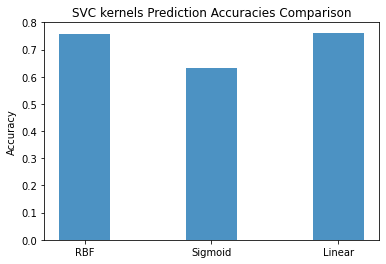

In [224]:
kernels = [SVCAccuracy, SVCAccuracy_s, SVCAccuracy_l]
kernels_label = ('RBF', 'Sigmoid', 'Linear')
y_pos = np.arange(len(kernels_label))
plt.bar(y_pos, kernels, width = 0.4, align='center', alpha=0.8)
plt.xticks(y_pos, kernels_label)
plt.ylabel('Accuracy')
plt.title('SVC kernels Prediction Accuracies Comparison')

In [225]:
print(kernels)

[0.7575757575757576, 0.6320346320346321, 0.7619047619047619]


Text(0.5, 1.0, 'Prediction Accuracy Comparison')

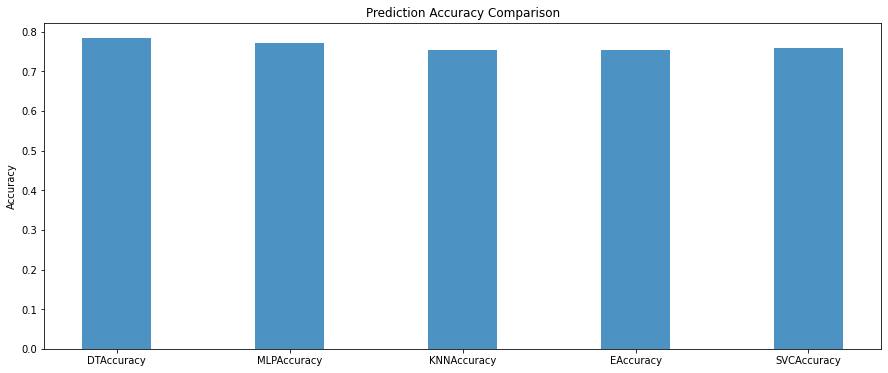

In [226]:
accuracy = [DTAccuracy, MLPAccuracy, KNNAccuracy, EAccuracy, SVCAccuracy]
plt.figure(figsize=(15,6))
x_label = ('DTAccuracy', 'MLPAccuracy', 'KNNAccuracy', 'EAccuracy', 'SVCAccuracy')
y_pos = np.arange(len(x_label))
plt.bar(y_pos, accuracy, width = 0.4, align='center', alpha=0.8)
plt.xticks(y_pos, x_label)
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy Comparison')

In [227]:
print(accuracy)

[0.7835497835497836, 0.7705627705627706, 0.7532467532467533, 0.7532467532467533, 0.7575757575757576]


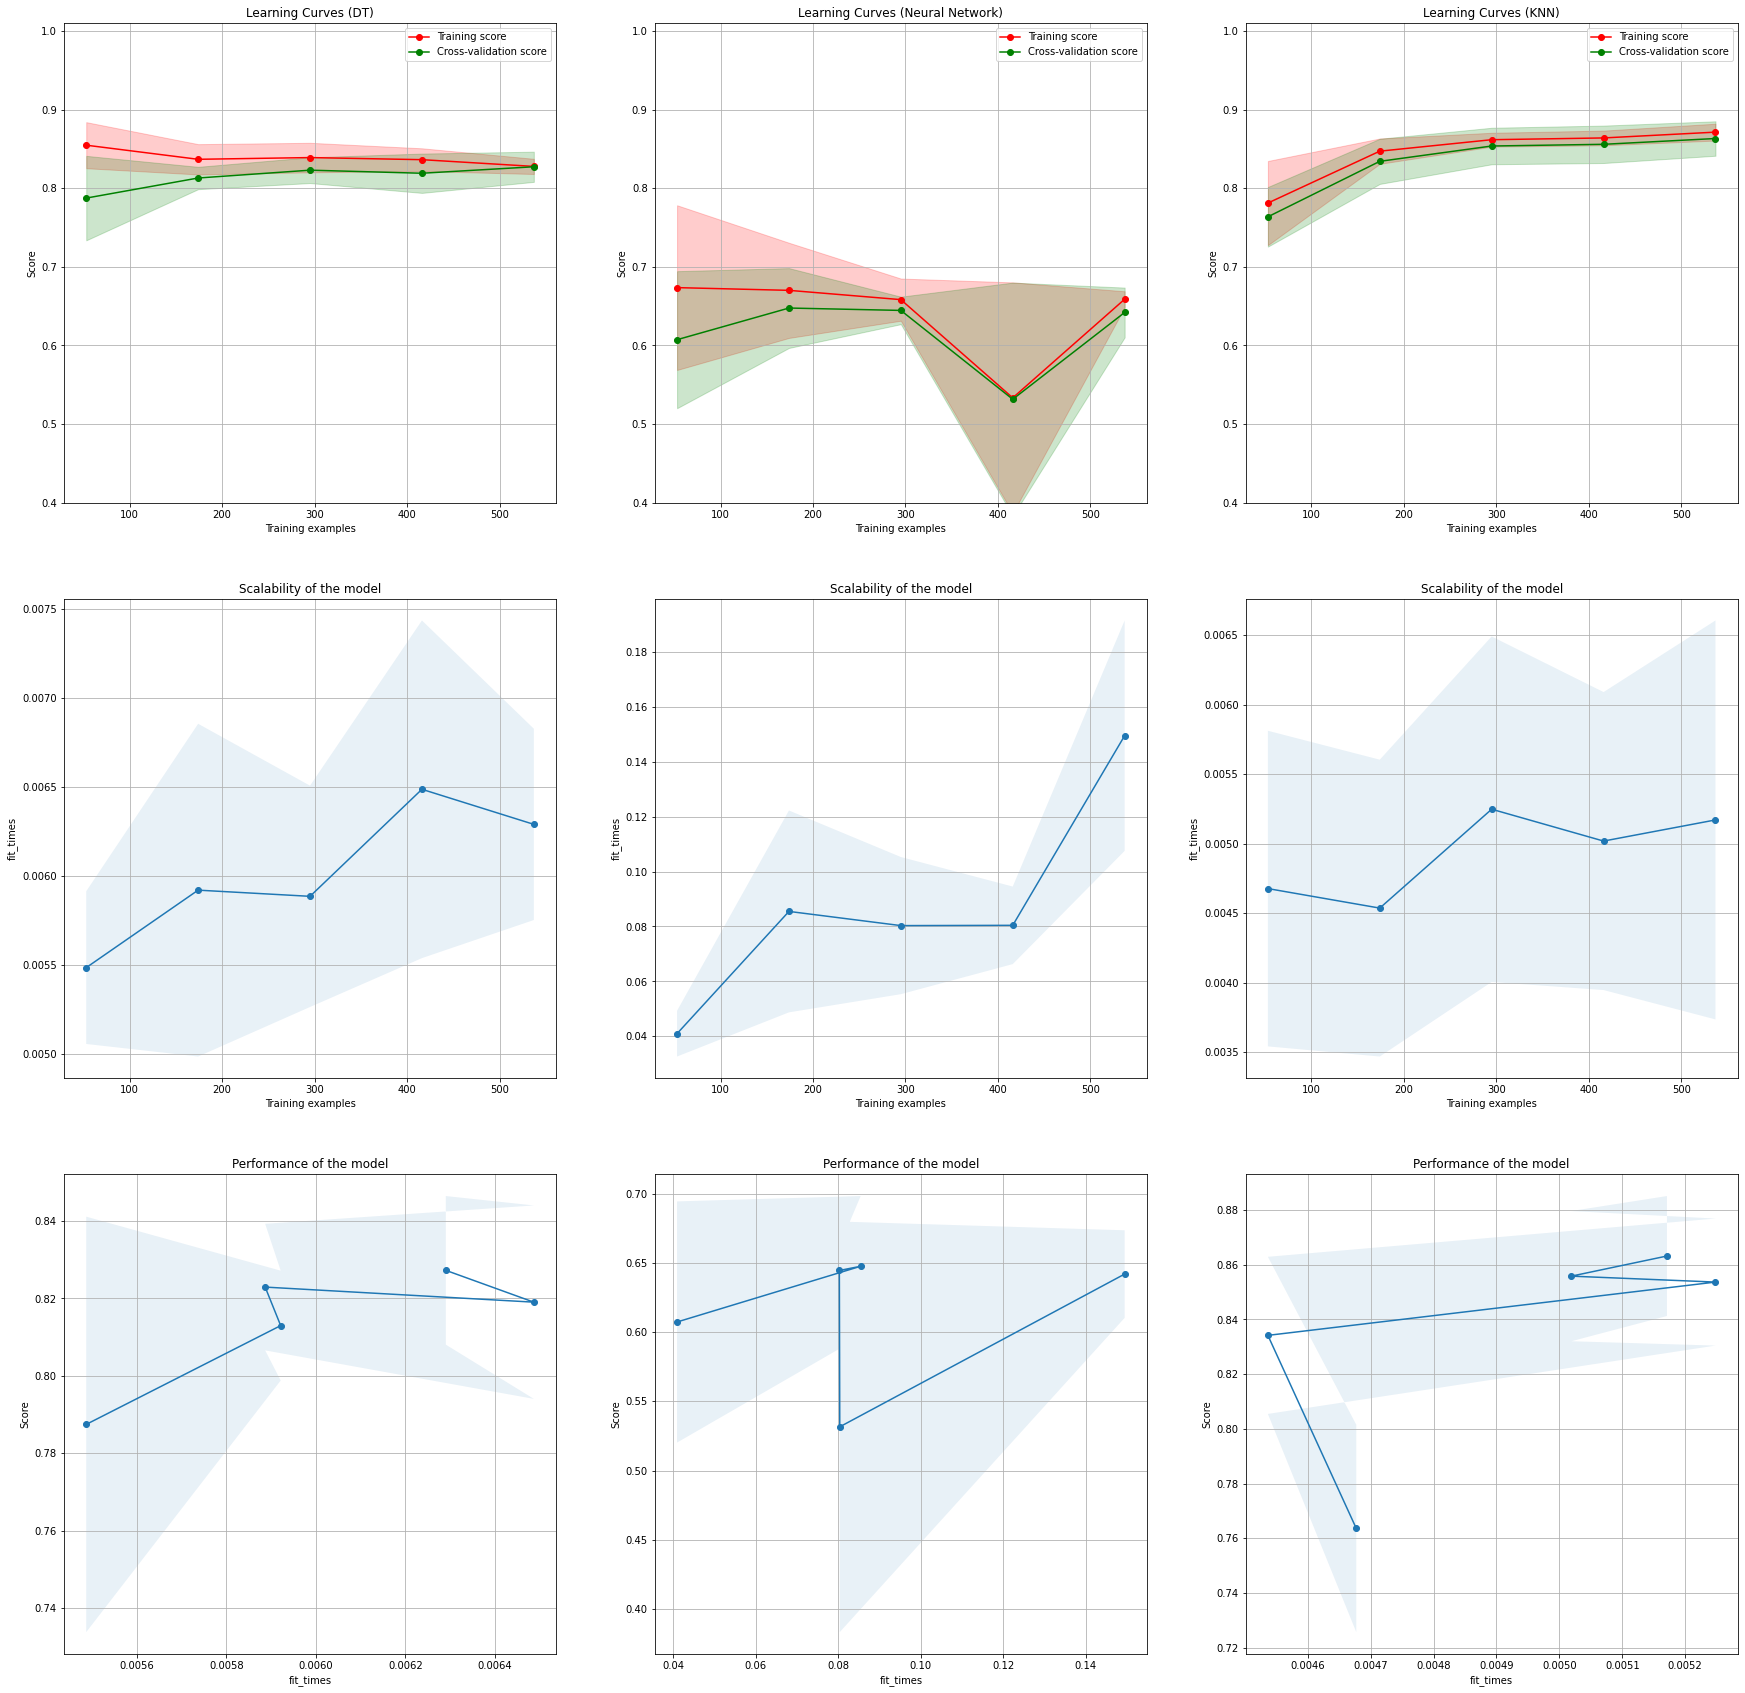

In [228]:

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 10))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    
    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 3, figsize=(30, 30))

title = "Learning Curves (DT)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = DecisionTreeClassifier(criterion='entropy',max_depth=2)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (Neural Network)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = MLPClassifier(solver = 'sgd', hidden_layer_sizes=(100,),random_state=42, activation = 'logistic', learning_rate_init = 0.1, max_iter=300)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)


title = "Learning Curves (KNN)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

estimator = KNN(14)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 2], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)


plt.show()

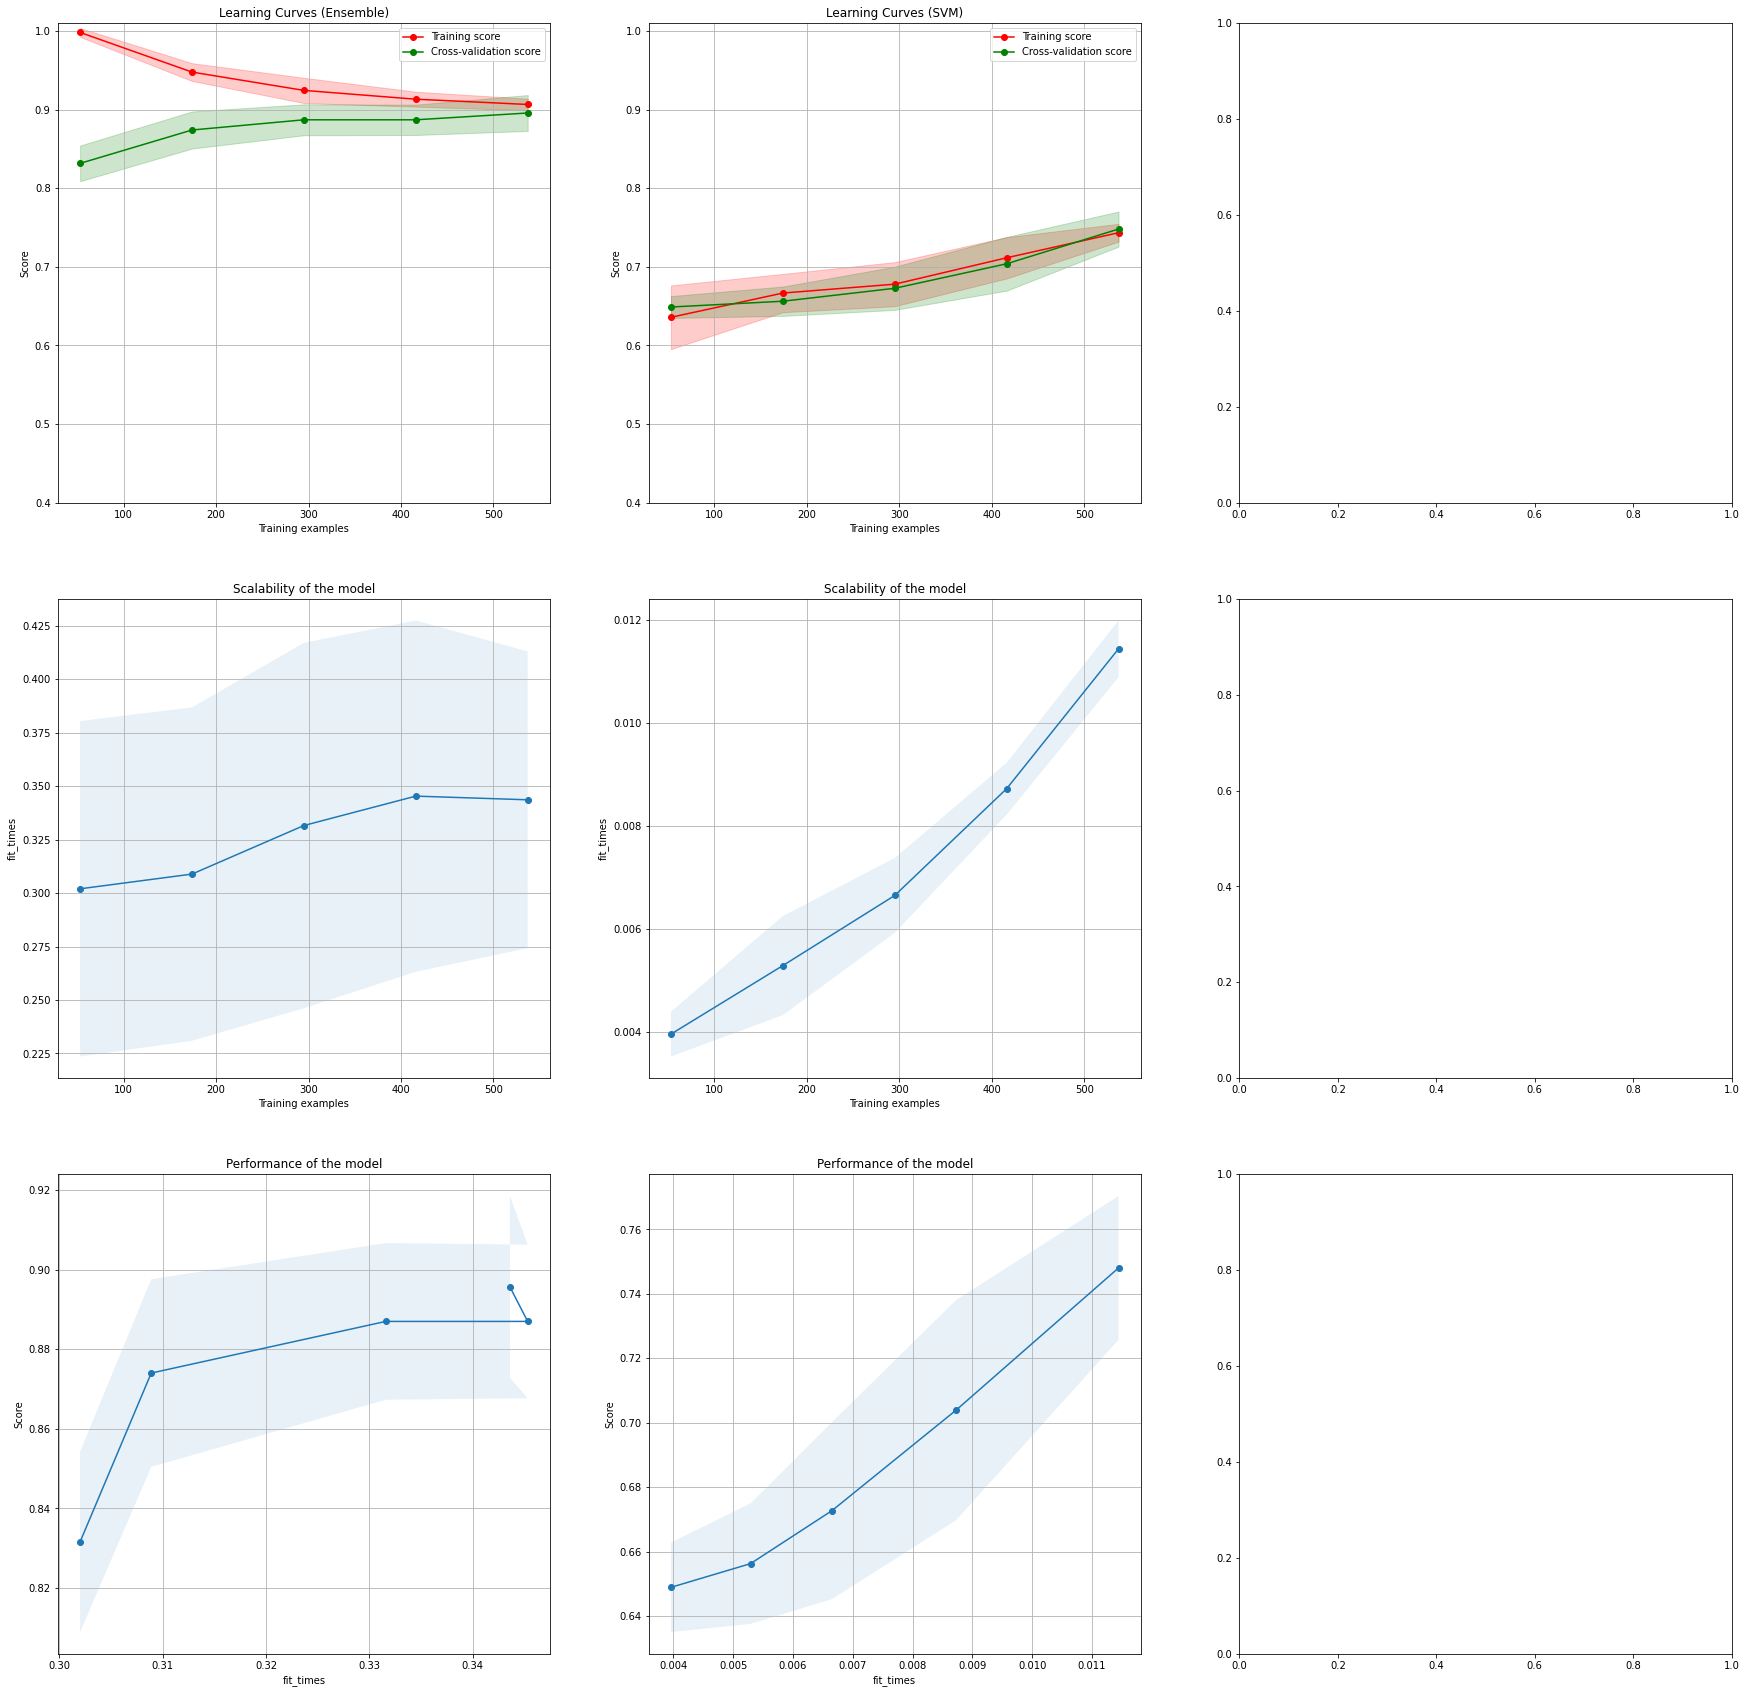

In [229]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 10))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    
    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    
    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3,3, figsize=(30, 30))


title = "Learning Curves (Ensemble)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = AdaBoostClassifier(random_state=7, learning_rate = 0.1, n_estimators = 120)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)



title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

estimator = SVC(kernel='rbf',random_state=42, C=0.1)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)



plt.show()

In [230]:
######### Result update ###########

